In [108]:
import numpy as np
from PIL import ImageGrab, Image
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
import matplotlib.image as mpimg

In [109]:
# importing libraries

import pyautogui
import time

# initializing variables for image processing

screenshot = pyautogui.screenshot()

# specifiying the path to save the image
# matthew macbook m2 air dimensions 2560 x 1664

In [110]:
# Conversion of images to video

import cv2
import os

folder_size = 123


def images_to_video(image_folder, video_name, fps):
    #images = [img for img in os.listdir(image_folder) if img.endswith(".tiff")]
    start = 17
    end = folder_size+17
    images = []
    for i in range(start, end):
        if i > 100:
            name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_0"
        else:
            name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00"
        name+=str(i)
        name+=".tiff"
        #print(name)
        images.append(name)
        
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

# Provide the path to the folder containing images, desired output video name, and frame rate
image_folder = '/Users/christianjohnson/Downloads/Glare/testPylonImages'
video_name = 'demoGLARE.mp4'
fps = 1  # Adjust the frame rate as per your requirement

images_to_video(image_folder, video_name, fps)

[ WARN:0@10494.883] global loadsave.cpp:248 findDecoder imread_('/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00100.tiff'): can't open/read file: check file path/integrity


In [111]:
"""
    universal_blocking takes an array of of any shape and a jump value. 
    It then finds the maximum average value of a block of size jump x jump
"""
def universal_blocking(array, jump):
    # Deriving the array demensions then trimming for ease of indexing
    r, c = array.shape
    r -= r%10
    c -= c%10
    array = array/255.
    #print(array.shape)
    ar1 = np.arange(0,r-1, jump)
    ar2 = np.arange(0,c-1, jump)
    max_value = 0.
    coord = ()



    # for i in ar1:
    #     for j in ar2:
    #         b_sum=0
    #         for i2 in range(square)




    for i in ar1:
        for j in ar2:
            b_sum = 0
            for i2 in range(jump):
                for j2 in range(jump):
                    #print(i+i2, j+j2)
                    b_sum += array[i+i2][j+j2]
            current_average = b_sum/(jump^2)
            if(current_average > max_value):
                #print(current_average, (i, j))
                max_value = current_average
                coord=(i,j)
    return coord

#coordmt = universal_blocking(heatmap,10)
#print(coordmt)

(0, 1180)
/Users/christianjohnson/Downloads/Glare/Saved_Images.DS_Store
/Users/christianjohnson/Downloads/Glare/Saved_Imagesimage.png


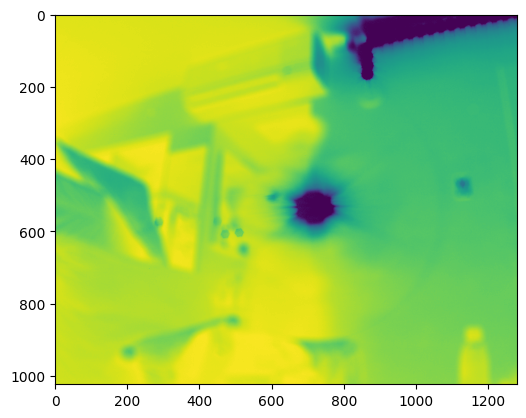

In [112]:
def overlay(tiff_path, jump):   
    im = Image.open(tiff_path)
    imarray = np.array(im)
    #print(imarray)
    #print(imarray[0][1024])
    #return
    coord = universal_blocking(imarray,jump)
    for i in range(jump):
        for j in range(jump):
            imarray[(coord[0]+i),(coord[1]+j)] = 0
    print(coord)
    imarray*=255
    im = Image.fromarray(imarray)
    imgplot = plt.imshow(im)

        


#print(overlay(heatmap,100))

start = 17
end = folder_size+17
images = []
for i in range(start, end):
    if i > 100:
        name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_0"
    else:
        name="/Users/christianjohnson/Downloads/Glare/testPylonImages/Basler_acA1300-200um__24681880__20240430_200842309_00"
    name+=str(i)
    name+=".tiff"
    images.append(name)

#for tiff_path in images:
#overlay(tiff_path, 10)
overlay(images[70], 10)
#img = Image.open(images[70])
#plt.imshow(img)

rasterio.open(images[70]).read()


for infile in os.listdir(folder_path):
    print(folder_path + infile)
    if infile[-3:] == "tif" or infile[-3:] == "bmp" :
       # print "is tif or bmp"
       outfile = infile[:-3] + "jpeg"
       im = Image.open(infile)
       print("new filename : " + outfile)
       out = im.convert("RGB")
       out.save(outfile, "JPEG", quality=90)


In [113]:
for infile in os.listdir("./"):
    print "file : " + infile
    if infile[-3:] == "tif" or infile[-3:] == "bmp" :
       # print "is tif or bmp"
       outfile = infile[:-3] + "jpeg"
       im = Image.open(infile)
       print "new filename : " + outfile
       out = im.convert("RGB")
       out.save(outfile, "JPEG", quality=90)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2442772391.py, line 2)